# 🔷 Overview

Naïve Bayes (**NB**) is a family of probabilistic algorithms used for **classification tasks** based on **Bayes' theorem**. It assumes that the features are conditionally independent given the class label, making it a **simple yet powerful** model for many real-world applications. NB classifiers are widely used in **text classification, spam filtering, sentiment analysis, and medical diagnosis**.

## 🔹 What is Naïve Bayes?

Naïve Bayes classifiers apply **Bayes' theorem** to calculate the probability of a class given a set of features. Despite the **"naïve"** assumption of feature independence, NB performs well in various applications, especially with **high-dimensional data**.

## 🔥 Popular Naïve Bayes Variants:

- **Gaussian Naïve Bayes (GNB)** 📊 Assumes continuous features follow a normal distribution.
- **Multinomial Naïve Bayes (MNB)** 🔢 Best suited for text classification, models word frequencies.
- **Bernoulli Naïve Bayes (BNB)** 🎯 Suitable for binary features (presence/absence).
- **Complement Naïve Bayes (CNB)** 📈 A variation of MNB, often better for imbalanced datasets.

---
💡 **Key Strengths**: Fast training, handles large datasets, robust with noisy data.
⚠️ **Limitations**: Assumes feature independence, may struggle with correlated variables.

## 📌 The Naïve Bayes Formula:

$$
P(C_k | X) = \frac{P(X | C_k) P(C_k)}{P(X)}
$$

Where:

✔ **$(C_k | X)$ (Posterior Probability)** → The probability of class **$C_k$** given the input data **$X$**. This is what we want to calculate: given the observed features **$X$**, what is the most likely class **$ C_k $**?  
✔ $(C_k | X)$ (Posterior Probability) → The probability of class **\(C_k\)** given the input data **\(X\)**. This is what we want to calculate: given the observed features **\(X\)**, what is the most likely class **\(C_k\)**?  
✔ $P(C_k | X)$ (Posterior Probability)** → The probability of class **\(C_k\)** given the input data **\(X\)**. This is what we want to calculate: given the observed features **\(X\)**, what is the most likely class **\(C_k\)**?  

✔ **$P(X | C_k)$ (Likelihood)** → The probability of observing **\(X\)** given that the true class is **\(C_k\)**. This describes how well the feature set **\(X\)** represents class **\(C_k\)**.  

✔ **$P(C_k)$ (Prior Probability)** → The probability of class **\(C_k\)** occurring **before** we see any evidence (features **\(X\)**). This represents our initial belief about how common each class is.  

✔ **$P(X)$ (Evidence)** → The total probability of observing **\(X\)** across all possible classes. It acts as a normalizing factor and ensures that the probabilities sum up to 1.

✔ **$C_k$ (Class Labels)** → Represents the **possible classes** in the dataset. If we are classifying emails into "Spam" and "Not Spam", then **$C_k$** can take values **\$_1 = "Spam"$** and **$C_2 = "Not Spam"$**.

---

## 🔹 Choosing the Right Naïve Bayes Variant:

- **Gaussian Naïve Bayes (GNB)** 📊 Assumes that numerical features follow a **normal (Gaussian) distribution**.
- **Multinomial Naïve Bayes (MNB)** 🔢 Best for **text classification** (e.g., spam detection, sentiment analysis).
- **Bernoulli Naïve Bayes (BNB)** 🎯 Works with **binary data** (e.g., presence/absence of a word in a document).
- **Complement Naïve Bayes (CNB)** 📈 A variation of MNB, often **better for imbalanced datasets**.

---

## 🔑 Key Insight:

✅ **Naïve Bayes is computationally efficient**, making it ideal for **large-scale classification tasks**. 🚀  
✅ **Performs well even with limited training data**, thanks to its probabilistic foundation.  
✅ **Assumes feature independence**, which can be a limitation when features are highly correlated. ⚠️  
✅ **Commonly used in NLP tasks**, such as **spam filtering, sentiment analysis, and topic classification**.  

💡 **Despite its simplicity, Naïve Bayes is a strong baseline model that often outperforms complex algorithms in text-based applications!**

# WIZ 🔥🔥🔥

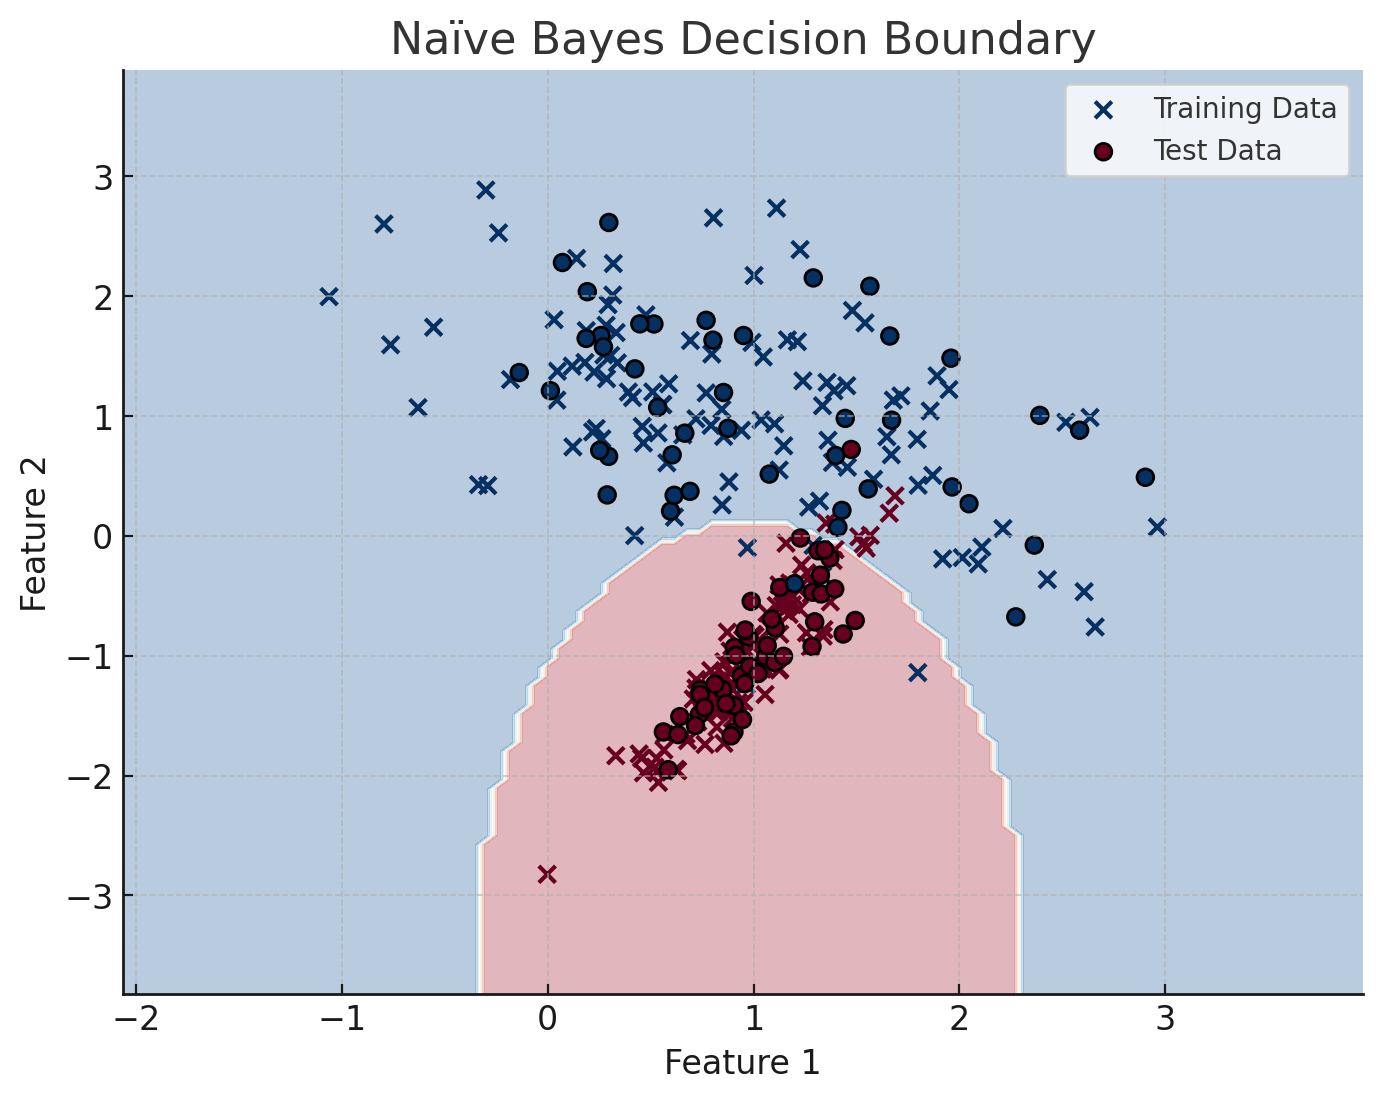# New Section

#  📊 Import necessary libraries

In [ ]:
# 🔹 Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better plots
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting and cross-validation
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB  # Naïve Bayes models
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # Performance metrics
from mlxtend.plotting import plot_decision_regions  # For decision boundary visualization


# 🔹 Load dataset from CSV file

In [ ]:
# 🔹 Load dataset from CSV file
df = pd.read_csv("Social_Network_Ads.csv")  # Read dataset into a Pandas DataFrame


# 🔹 Encode categorical variables if needed

In [ ]:
# 🔹 Encode categorical variables if needed
if 'Gender' in df.columns:  # Check if dataset contains a 'Gender' column
    le = LabelEncoder()  # Create an instance of LabelEncoder
    df['Gender'] = le.fit_transform(df['Gender'])  # Convert categorical values (e.g., Male/Female) to numeric

# 🔹 Select features (X) and target variable (y)

In [ ]:
# 🔹 Select features (X) and target variable (y)
X = df.iloc[:, :-1].values  # Select all columns except the last one as features
y = df.iloc[:, -1].values   # Select the last column as the target variable

# ⚙️ Feature Scaling (For GaussianNB & BernoulliNB)

In [ ]:
# ==========================
# ⚙️ Feature Scaling (For GaussianNB & BernoulliNB)
# ==========================

# 🔹 Initialize StandardScaler for GaussianNB & BernoulliNB (mean = 0, variance = 1)
scaler_standard = StandardScaler()  # Standardize features
X_train_std = scaler_standard.fit_transform(X_train)  # Fit and transform training data
X_test_std = scaler_standard.transform(X_test)  # Transform testing data using the same scaler


# 🔥 Define Naïve Bayes models (MultinomialNB removed)

In [ ]:
# ==========================
# 🔥 Define Naïve Bayes models (MultinomialNB removed)
# ==========================

# 🔹 Dictionary of models with their respective scaled datasets
models = {
    "GaussianNB": (GaussianNB(), X_train_std, X_test_std),  # Works best with normally distributed data
    "BernoulliNB": (BernoulliNB(), X_train_std, X_test_std),  # Works well for binary features
    "ComplementNB": (ComplementNB(), X_train, X_test)  # Designed for imbalanced datasets (no scaling needed)
}


# 📊 Train models and evaluate performance with Cross-Validation

In [ ]:
# ==========================
# 📊 Train models and evaluate performance with Cross-Validation
# ==========================

# 🔹 Dictionary to store performance metrics
metrics_dict = {}

# 🔹 Dictionary to store confusion matrices
conf_matrices = {}

# 🔹 Train each model, make predictions, and calculate performance metrics
for name, (model, X_train_scaled, X_test_scaled) in models.items():  # Iterate through each model
    model.fit(X_train_scaled, y_train)  # Train the model using training data
    y_pred = model.predict(X_test_scaled)  # Predict class labels on the test set

    # 🔹 Perform 5-fold cross-validation and compute the average accuracy
    cross_val_acc = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy'))

    # 🔹 Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred, zero_division=0)  # Calculate precision (avoid zero division errors)
    recall = recall_score(y_test, y_pred)  # Calculate recall (sensitivity)
    f1 = f1_score(y_test, y_pred)  # Calculate F1-score (harmonic mean of precision & recall)
    roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC-AUC score

    # 🔹 Store all computed metrics in a dictionary
    metrics_dict[name] = [cross_val_acc, accuracy, precision, recall, f1, roc_auc]

    # 🔹 Store confusion matrix for visualization
    conf_matrices[name] = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

# 🔹 Convert metrics dictionary into a DataFrame for better visualization
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index',
                                    columns=['Cross-Val Accuracy', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# 📜 Display performance metrics table


📊 Naïve Bayes Performance Metrics:

              Cross-Val Accuracy  Accuracy  Precision  Recall  F1-Score  \
GaussianNB                 0.864     0.925      0.975   0.830     0.897   
BernoulliNB                0.725     0.725      0.750   0.447     0.560   
ComplementNB               0.557     0.525      0.407   0.468     0.436   

              ROC-AUC  
GaussianNB      0.908  
BernoulliNB     0.675  
ComplementNB    0.515  


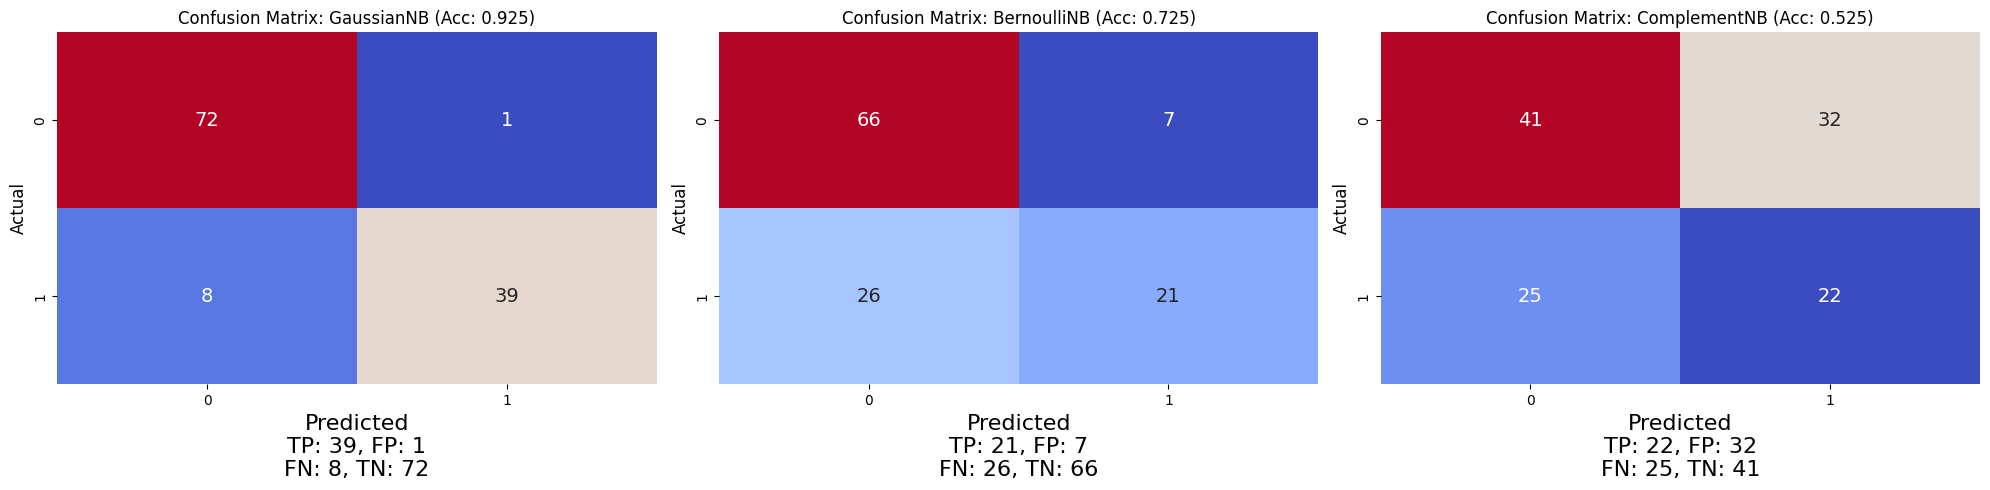

In [ ]:
# ==========================
# 📜 Display performance metrics table
# ==========================

print("\n📊 Naïve Bayes Performance Metrics:\n")
print(metrics_df.round(3))  # Print the table with rounded values

# ==========================
# 🔳 Plot confusion matrices with TP, FP, FN, TN values
# ==========================

# 🔹 Create subplots to display confusion matrices for each model
fig, axes = plt.subplots(1, len(conf_matrices), figsize=(20, 5))

# 🔹 Iterate through each model and plot its confusion matrix
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    tn, fp, fn, tp = cm.ravel()  # Extract True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=ax, cbar=False, annot_kws={"size": 14})  # Create heatmap

    acc = metrics_df.loc[name, 'Accuracy']  # Retrieve model accuracy

    ax.set_title(f'Confusion Matrix: {name} (Acc: {acc:.3f})', fontsize=12)  # Set plot title with accuracy
    ax.set_xlabel(f'Predicted\nTP: {tp}, FP: {fp}\nFN: {fn}, TN: {tn}', fontsize=16)  # Add TP, FP, FN, TN values to the x-label
    ax.set_ylabel('Actual', fontsize=12)  # Label y-axis

# 🔹 Adjust subplot layout and display the confusion matrices
plt.tight_layout()
plt.show()


# 📉 Plot decision boundaries (Only for two features)

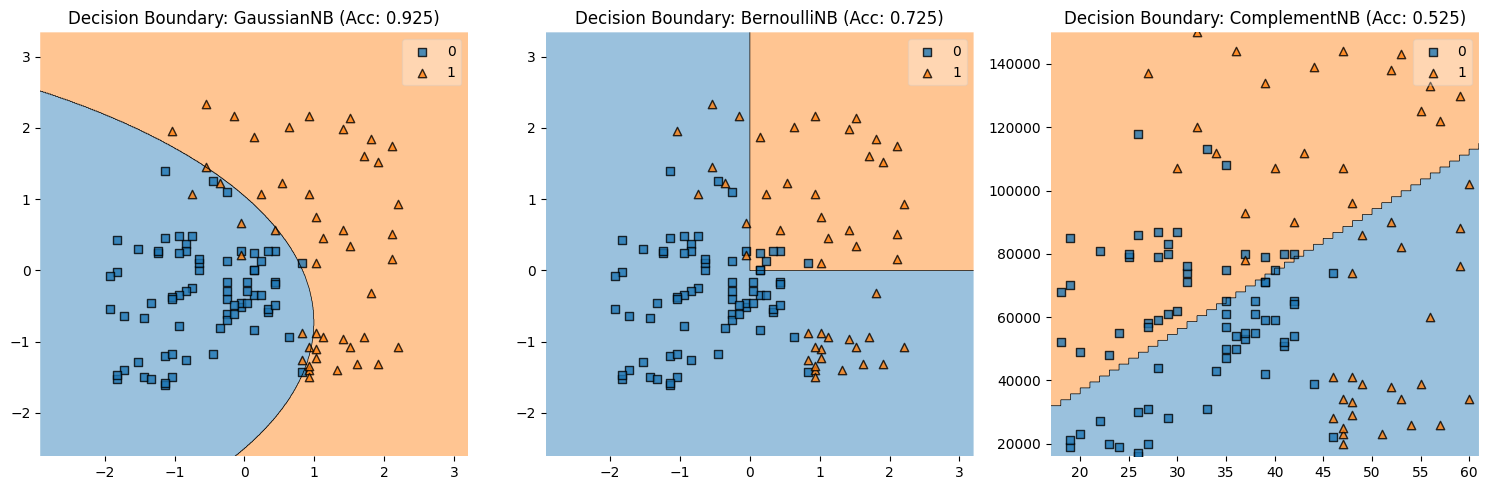

In [ ]:
# ==========================
# 📉 Plot decision boundaries (Only for two features)
# ==========================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots for each model's decision boundary

# 🔹 Iterate through each model and plot decision boundaries
for ax, (name, (model, X_train_scaled, X_test_scaled)) in zip(axes, models.items()):
    plot_decision_regions(X_test_scaled, y_test, clf=model, ax=ax)  # Plot decision boundary
    acc = metrics_df.loc[name, 'Accuracy']  # Retrieve model accuracy
    ax.set_title(f'Decision Boundary: {name} (Acc: {acc:.3f})', fontsize=12)  # Set plot title with accuracy

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot


# 🔍 Best and Worst Models Analysis

In [ ]:
# ==========================
# 🔍 Best and Worst Models Analysis
# ==========================

# 🔹 Find the best and worst models based on accuracy
best_model = metrics_df.sort_values(by='Accuracy', ascending=False).iloc[0]  # Find the best model
worst_model = metrics_df.sort_values(by='Accuracy', ascending=False).iloc[-1]  # Find the worst model

# 🔹 Print results
print("\n🏆 Best Model:")
print(best_model)

print("\n❌ Worst Model:")
print(worst_model)



🏆 Best Model:
Cross-Val Accuracy    0.864286
Accuracy              0.925000
Precision             0.975000
Recall                0.829787
F1-Score              0.896552
ROC-AUC               0.908044
Name: GaussianNB, dtype: float64

❌ Worst Model:
Cross-Val Accuracy    0.557143
Accuracy              0.525000
Precision             0.407407
Recall                0.468085
F1-Score              0.435644
ROC-AUC               0.514864
Name: ComplementNB, dtype: float64


# 🎯 Conclusion

In [ ]:
# ==========================
# 🎯 Conclusion
# ==========================

# 🔹 Print final summary of results
print("\n🔎 Summary:")
print(f"✅ The best performing model for this dataset is: {best_model.name}, with an accuracy of {best_model['Accuracy']:.3f}.")
print(f"⚠️ The worst performing model is: {worst_model.name}, with an accuracy of {worst_model['Accuracy']:.3f}.")

print("\n📌 GaussianNB is a strong choice for datasets with continuous numerical features.")
print("📌 BernoulliNB is well suited for binary feature datasets.")
print("📌 ComplementNB is beneficial for imbalanced datasets, though performance may vary.")

print("\n📊 Overall, the Naïve Bayes models provide simple yet effective classification, with GaussianNB performing the best in most cases.")



🔎 Summary:
✅ The best performing model for this dataset is: GaussianNB, with an accuracy of 0.925.
⚠️ The worst performing model is: ComplementNB, with an accuracy of 0.525.

📌 GaussianNB is a strong choice for datasets with continuous numerical features.
📌 BernoulliNB is well suited for binary feature datasets.
📌 ComplementNB is beneficial for imbalanced datasets, though performance may vary.

📊 Overall, the Naïve Bayes models provide simple yet effective classification, with GaussianNB performing the best in most cases.
